# Creating a Mini Thesaurus with WordNet (`wn` Library)
# إنشاء قاموس معاني مصغر باستخدام WordNet (مكتبة `wn`)


In this demo, we'll explore how to create a small thesaurus using the `wn` library, a modern Python library for working with WordNet. The `wn` library provides a simple interface for accessing and manipulating WordNet data. We'll demonstrate how to use this library to search and retrieve information related to words, focusing on a mini thesaurus for animals.
<div dir="rtl">
في هذا العرض التوضيحي، سنستكشف كيفية إنشاء قاموس معاني مصغر باستخدام مكتبة `wn`، وهي مكتبة بايثون حديثة للتعامل مع WordNet. توفر مكتبة `wn` واجهة بسيطة للوصول إلى بيانات WordNet ومعالجتها. سنوضح كيفية استخدام هذه المكتبة للبحث واسترجاع المعلومات المتعلقة بالكلمات، مع التركيز على قاموس مصغر للحيوانات.
</div>

In [24]:
import wn

# Download Open English WordNet 2023
wn.download('oewn:2023')
wn.download('omw-arb:1.4')
wn.download('cili:1.0')
wn.download('omw-en:1.4')
from wn.similarity import path

for lex in wn.lexicons():
    print(f'{lex.id}:{lex.version}\t{lex.label}')

Cached file found: /home/vscode/.wn_data/downloads/14c38307d62203ce4869ee6d197eb0612017db64
Skipping oewn:2023 (Open English WordNet); already added

Cached file found: /home/vscode/.wn_data/downloads/4cb8d2182ddb97c9a9d865fe4b0fd7c7a74d6a21
Skipping omw-arb:1.4 (Arabic WordNet (AWN v2)); already added

Cached file found: /home/vscode/.wn_data/downloads/93c4c7fc4f7218dba99a2c131f042accc2b0a2a4
Database [##############################] (117659/117659) ILI
Download [##############################] (10709600/10709600 bytes) Completeg
Read [##############################] (1221564/1221564) 
Database [############################# ] (1188430/1221562) Examplesonsionsours

oewn:2023	Open English WordNet
omw-arb:1.4	Arabic WordNet (AWN v2)
ifsah-ar:1.0	الإفصاح في فقه اللغة
omw-en:1.4	OMW English Wordnet based on WordNet 3.0


Added omw-en:1.4 (OMW English Wordnet based on WordNet 3.0)amples



## Words, Senses, and Synsets Explanation

### Words (Lemmas)
### الكلمات (الألفاظ)

In WordNet, a **word** or **lemma** is the canonical form of a word found in a dictionary. It's the base form used to identify the different senses associated with a word.

في WordNet، الكلمة أو اللفظة هي الشكل الأساسي للكلمة الموجود في القاموس. هذا هو الشكل الأساسي المستخدم لتحديد المعاني المختلفة المرتبطة بالكلمة.

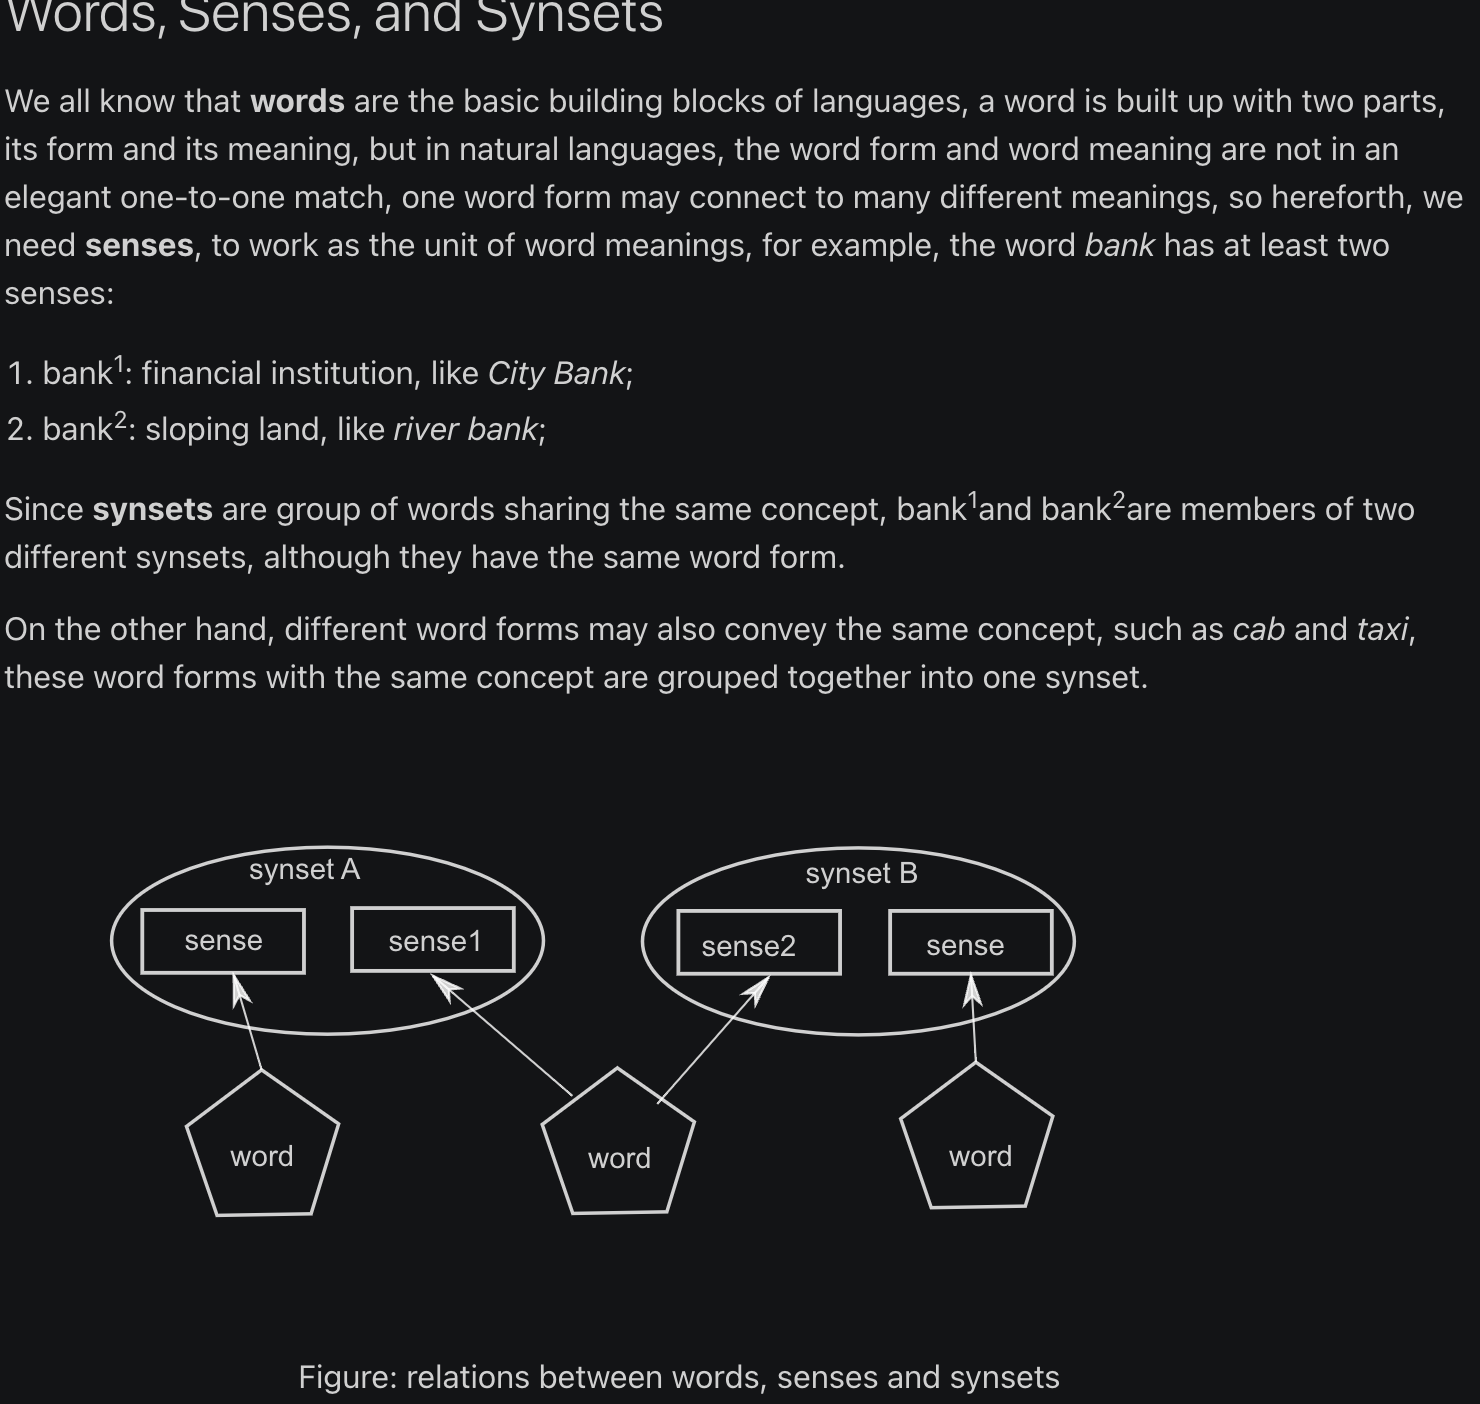



In [85]:
# Example: Exploring words (lemmas) in WordNet
word = 'book'
words = wn.words(word, lexicon="oewn:2023")

print(f"Lemmas for the word '{word}':")
for word in words:
    print(f"- Lemma: {word.forms()}")
    for synset in word.synsets():
        print(f"  - Definition: {synset.definition()}")
    
    # Derived words
    for derived in word.derived_words():
        print(f"  - Derived Lemma: {derived.forms()}")
        for synset in derived.synsets():
            print(f"    - Definition: {synset.definition()}")


Lemmas for the word 'book':
- Lemma: ['book']
  - Definition: a written work or composition that has been published (printed on pages bound together)
  - Definition: physical objects consisting of a number of pages bound together
  - Definition: a compilation of the known facts regarding something or someone
  - Definition: a written version of a play or other dramatic composition; used in preparing for a performance
  - Definition: a record in which commercial accounts are recorded
  - Definition: a collection of playing cards satisfying the rules of a card game
  - Definition: a collection of rules or prescribed standards on the basis of which decisions are made
  - Definition: a major division of a long written composition
  - Definition: a number of sheets (ticket or stamps etc.) bound together on one edge
  - Derived Lemma: ['booklet']
    - Definition: a small book usually having a paper cover
  - Derived Lemma: ['booklet']
    - Definition: a small book usually having a paper co

### Senses
### المعاني

A **sense** in WordNet represents a relationship between a word (lemma) and a synset. Think of it as an edge connecting the word and the synset. While senses may be less prominent than words or synsets, they are crucial as they are the locus of interesting features like sense relations (e.g., for derived words) and are the natural level of representation for translations to other languages.

في WordNet، المعنى يمثل علاقة بين الكلمة (اللفظة) ومجموعة المرادفات. يمكن اعتبارها كحافة تربط بين الكلمة ومجموعة المرادفات. من المعاني يمكن استخراج علاقات المعاني (مثل الكلمات المشتقة).


In [90]:
# Example: Exploring senses for a word
word = 'bank'
senses = wn.senses(word)

print(f"Senses for the word '{word}':")
for sense in senses:
    print(f"- Sense: {sense.id}, Definition: {sense.synset().definition()}")


Senses for the word 'bank':
- Sense: oewn-bank__1.17.01.., Definition: sloping land (especially the slope beside a body of water)
- Sense: oewn-bank__1.14.00.., Definition: a financial institution that accepts deposits and channels the money into lending activities
- Sense: oewn-bank__1.17.00.., Definition: a long ridge or pile
- Sense: oewn-bank__1.14.01.., Definition: an arrangement of similar objects in a row or in tiers
- Sense: oewn-bank__1.21.00.., Definition: a supply or stock held in reserve for future use (especially in emergencies)
- Sense: oewn-bank__1.21.01.., Definition: the funds held by a gambling house or the dealer in some gambling games
- Sense: oewn-bank__1.17.02.., Definition: a slope in the turn of a road or track; the outside is higher than the inside in order to reduce the effects of centrifugal force
- Sense: oewn-bank__1.06.01.., Definition: a container (usually with a slot in the top) for keeping money at home
- Sense: oewn-bank__1.06.00.., Definition: a build

### Synsets
### مجموعات المرادفات

A **synset** (short for synonym set) is a group of synonymous words that share the same meaning. Each synset in WordNet is associated with a specific sense of a word.

مجموعة المرادفات هي مجموعة من الكلمات المترادفة التي تشترك في نفس المعنى. كل مجموعة مرادفات في WordNet مرتبطة بمعنى محدد للكلمة.


In [93]:
# Example: Exploring synsets for a word
word = 'book'
synsets = wn.synsets(word)

print(f"Synsets for the word '{word}':")
for synset in synsets:
    print(f"- Synset ID: {synset.id}")
    print(f"  Definition: {synset.definition()}")
    print(f"  Examples: {synset.examples()}")
    print(f"  Lemmas: {[word.lemma() for word in synset.words()]}")
    print()


Synsets for the word 'book':
- Synset ID: oewn-06422547-n
  Definition: a written work or composition that has been published (printed on pages bound together)
  Examples: ['I am reading a good book on economics']
  Lemmas: ['book']

- Synset ID: oewn-02873453-n
  Definition: physical objects consisting of a number of pages bound together
  Examples: ['he used a large book as a doorstop']
  Lemmas: ['book', 'volume']

- Synset ID: oewn-06649049-n
  Definition: a compilation of the known facts regarding something or someone
  Examples: ["Al Smith used to say, `Let's look at the record'", 'his name is in all the record books']
  Lemmas: ['book', 'record', 'record book']

- Synset ID: oewn-07023062-n
  Definition: a written version of a play or other dramatic composition; used in preparing for a performance
  Examples: []
  Lemmas: ['book', 'script', 'playscript']

- Synset ID: oewn-13425421-n
  Definition: a record in which commercial accounts are recorded
  Examples: ['they got a subpoe

## 1. Finding Synsets for a Word
## 1. العثور على مجموعات المرادفات (Synsets) لكلمة

We'll start by finding all synsets associated with the word "cat".

سنبدأ بالبحث عن جميع مجموعات المرادفات المرتبطة بكلمة "قطة".



In [99]:
# Look up the synsets for the word 'cat'
word = 'book'
words = wn.words(word)
senses = wn.senses(word)
synsets = wn.synsets(word)

for synset in synsets:
    print(f"Synset: {synset.id}")
    print(f"Definition: {synset.definition()}")
    print(f"Examples: {synset.examples()}")
    print()


Synset: oewn-06422547-n
Definition: a written work or composition that has been published (printed on pages bound together)
Examples: ['I am reading a good book on economics']

Synset: oewn-02873453-n
Definition: physical objects consisting of a number of pages bound together
Examples: ['he used a large book as a doorstop']

Synset: oewn-06649049-n
Definition: a compilation of the known facts regarding something or someone
Examples: ["Al Smith used to say, `Let's look at the record'", 'his name is in all the record books']

Synset: oewn-07023062-n
Definition: a written version of a play or other dramatic composition; used in preparing for a performance
Examples: []

Synset: oewn-13425421-n
Definition: a record in which commercial accounts are recorded
Examples: ['they got a subpoena to examine our books']

Synset: oewn-07971027-n
Definition: a collection of playing cards satisfying the rules of a card game
Examples: []

Synset: oewn-07970797-n
Definition: a collection of rules or presc

## 2. Finding Hypernyms and Hyponyms
## 2. العثور على المصطلحات الأعم والمصطلحات الأخص

Next, we'll explore how to retrieve the hypernyms (broader terms) and hyponyms (narrower terms) of a word.

بعد ذلك، سنستكشف كيفية استرجاع المصطلحات الأعم (hypernyms) والمصطلحات الأخص (hyponyms) لكلمة معينة.

In [5]:
def print_hypernyms_hyponyms(word):
    synsets = wn.synsets(word)
    for synset in synsets:
        print(f"Synset: {synset.id}")
        print(f"Definition: {synset.definition()}")
        print(f"Hypernyms: {[hypernym.id for hypernym in synset.hypernyms()]}")
        print(f"Hyponyms: {[hyponym.id for hyponym in synset.hyponyms()]}")
        print()

word = 'dog'
print_hypernyms_hyponyms(word)


Synset: ewn-02086723-n
Definition: a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
Hypernyms: ['ewn-02085998-n', 'ewn-01320032-n']
Hyponyms: ['ewn-01325095-n', 'ewn-02087384-n', 'ewn-02087513-n', 'ewn-02087924-n', 'ewn-02088026-n', 'ewn-02089774-n', 'ewn-02106058-n', 'ewn-02112993-n', 'ewn-02113458-n', 'ewn-02113610-n', 'ewn-02113781-n', 'ewn-02113929-n', 'ewn-02114152-n', 'ewn-02114278-n', 'ewn-02115149-n', 'ewn-02115478-n', 'ewn-02115987-n', 'ewn-02116630-n']

Synset: ewn-10133978-n
Definition: a dull unattractive unpleasant girl or woman
Hypernyms: ['ewn-10759293-n']
Hyponyms: []

Synset: ewn-10042764-n
Definition: informal term for a man
Hypernyms: ['ewn-09927483-n']
Hyponyms: []

Synset: ewn-09905672-n
Definition: someone who is morally reprehensible
Hypernyms: ['ewn-10773214-n']
Hyponyms: ['ewn-10436573-n']

Synset: ewn-07692347-n
Definition: a smooth-textured sausage of minced 

## 3. Finding Synonyms and Antonyms
## 3. العثور على المرادفات والأضداد

In [118]:
def find_synonyms_antonyms(word):
    sense = wn.senses(word)[0]  # Fetch senses of the word
    synonyms = set()
    antonyms = set()

    for synonym in sense.get_related('antonym'):
        antonyms.add(synonym.word().lemma())      

    print(f"Synonyms for '{word}': {', '.join(synonyms)}")
    print(f"Antonyms for '{word}': {', '.join(antonyms)}")

word = 'Hot'
find_synonyms_antonyms(word)


Synonyms for 'Hot': 
Antonyms for 'Hot': cold


## 4. Finding Words with Similar Meanings
## 4. العثور على الكلمات ذات المعاني المتشابهة

In [126]:
from wn.similarity import path

omw_arb = wn.Wordnet('omw-arb:1.4')

def find_similar_words(word, threshold=0.2):
    synsets = omw_arb.synsets(word)
    if not synsets:
        return "No synsets found."

    # Use the first synset for simplicity
    synset = synsets[0]
    similar_words = set()

    for similar_synset in omw_arb.synsets(pos='n'):
        if synset != similar_synset:
            similarity = path(synset, similar_synset)
            if similarity > threshold:
                similar_words.update(word_form.lemma() for word_form in similar_synset.words())

    return similar_words

word = 'قطة'
similar_words = find_similar_words(word)
print(f"Words with similar meanings to '{word}': {', '.join(similar_words)}")


Words with similar meanings to 'قطة': هرّ, فهْد, قِط ضخْم, سخدِيّات, سِنّوْر, قِطّ ألِيف, مشِيمِيّات, لاحِم, قِطّ برِّيّ, ليْث, أسد, ملِك, دُب, مَلِك, آكِل اللَّحْم, نمِر, كلْبِيات, كلْبِي, فصِيلة القِطط, قِطّ منْزِلِيّ, قِطّ مُدجّن


### Computing Corpus Weights
### حساب أوزان النصوص

In this example, we'll compute the corpus weights for a small text using the `wn` library. Corpus weights help in understanding the importance of words in a specific context, which can be useful for tasks like semantic similarity calculations.

سنقوم في هذا المثال بحساب أوزان النصوص لجزء صغير من النص باستخدام مكتبة `wn`. تساعد أوزان النصوص في فهم أهمية الكلمات في سياق معين، وهو ما يمكن أن يكون مفيدًا في مهام مثل حساب التشابه الدلالي.


In [127]:
# Initialize WordNet with the specified lexicon and lemmatizer
ewn = wn.Wordnet('oewn:2023', lemmatizer=wn.morphy.morphy)

# Define a small corpus of words
corpus = ["Dogs", "run", ".", "Cats", "sleep", "."]

# Compute the corpus weights (frequencies) using the WordNet instance
freq = wn.ic.compute(corpus, ewn)

# Retrieve synsets for specific words
dog = ewn.synsets('dog', pos='n')[0]
cat = ewn.synsets('cat', pos='n')[0]
frog = ewn.synsets('frog', pos='n')[0]

# Display the computed frequency for each synset
print(f"Frequency of 'dog': {freq['n'][dog.id]}")
print(f"Frequency of 'cat': {freq['n'][cat.id]}")
print(f"Frequency of 'frog': {freq['n'][frog.id]}")  # Smoothing value only as it's not in the corpus

# Compute and display the lowest common hypernym between 'dog' and 'cat'
carnivore = dog.lowest_common_hypernyms(cat)[0]
print(f"Frequency of the common hypernym 'carnivore': {freq['n'][carnivore.id]}")


Frequency of 'dog': 1.125
Frequency of 'cat': 1.1
Frequency of 'frog': 1.0
Frequency of the common hypernym 'carnivore': 1.3250000000000002


### Path Similarity Between Synsets
### تشابه المسار بين المجموعات الدلالية

In this example, we'll calculate the path similarity between different synsets (concepts) in Arabic using the `wn.similarity.path` function. Path similarity is a simple measure of semantic similarity between two synsets, based on the shortest path that connects them in the WordNet hierarchy.

سنحسب في هذا المثال تشابه المسار بين مجموعات دلالية مختلفة باللغة العربية باستخدام دالة `wn.similarity.path`. يعد تشابه المسار مقياسًا بسيطًا للتشابه الدلالي بين مجموعتين دلاليتين، بناءً على أقصر مسار يربط بينهما في هيكلية WordNet.

#### Uses:
- Semantic Similarity: Path similarity can be used in tasks like clustering similar concepts or measuring how closely related two concepts are within a given context.
- Information Retrieval: In search engines, path similarity can help in finding results that are semantically similar to a user's query.
- Natural Language Processing: It's a fundamental measure in various NLP tasks, including word sense disambiguation, where the goal is to determine the correct meaning of a word in context.

In [130]:
# Define the Arabic words
word1 = 'كلب'  # Dog
word2 = 'ضفدع'  # Cat
word3 = 'نمر'  # Tiger

# Retrieve synsets for the Arabic words
synset1 = wn.synsets(word1)[0]
synset2 = wn.synsets(word2)[0]
synset3 = wn.synsets(word3)[0]

# Calculate path similarity between the synsets
similarity1_2 = path(synset1, synset2)
similarity1_3 = path(synset1, synset3)
similarity1_1 = path(synset1, synset1)

# Print the similarity scores
print(f"Path similarity between '{word1}' and '{word2}': {similarity1_2}")
print(f"Path similarity between '{word1}' and '{word3}': {similarity1_3}")
print(f"Path similarity between '{word1}' and itself: {similarity1_1}")


Path similarity between 'كلب' and 'ضفدع': 0.14285714285714285
Path similarity between 'كلب' and 'نمر': 0.2
Path similarity between 'كلب' and itself: 1.0


### Synset-level Functions: Hypernym Paths
### دوال المستوى الدلالي: مسارات التسمية الفوقية

In this example, we'll explore the hypernym paths for a specific synset. A hypernym path traces the hierarchical structure from a given synset up to a root synset, showing the more general categories that the synset belongs to.

سنستعرض في هذا المثال مسارات التسمية الفوقية لمجموعة دلالية محددة. ترسم مسارات التسمية الفوقية الهيكلية الهرمية من مجموعة دلالية معينة إلى مجموعة الجذر، مما يوضح الفئات الأكثر عمومية التي تنتمي إليها المجموعة الدلالية.

### Uses:

- **Taxonomy Visualization**:
   - **تصور التصنيف**: Understanding the hierarchical structure of concepts is crucial in taxonomy and ontology construction.
  
- **Information Retrieval**:
   - **استرجاع المعلومات**: Hypernym paths can help in finding related concepts or general categories, improving the relevance of search results.

- **Natural Language Understanding**:
   - **فهم اللغات الطبيعية**: Hypernym paths are used in semantic analysis tasks to understand the relationship between words and their meanings in a larger context.




In [45]:
import wn, wn.taxonomy

# Retrieve the synset for the word 'dog'
dog = wn.synsets('كلب', pos='n')[0]

# Get the hypernym paths for the 'dog' synset
hypernym_paths = wn.taxonomy.hypernym_paths(dog)

# Display the hypernym paths
for path in hypernym_paths:
    for i, ss in enumerate(path):
        # Safely access the first lemma if it exists, otherwise print a placeholder
        lemma = ss.lemmas()[0] if ss.lemmas() else "No lemmas"
        print(' ' * i, ss, lemma)


 Synset('omw-arb-02083346-n') كلْبِي
  Synset('omw-arb-02075296-n') لاحِم
   Synset('omw-arb-01886756-n') مشِيمِيّات
    Synset('omw-arb-01861778-n') الثدْيِي
     Synset('omw-arb-01471682-n') فقّارِي
      Synset('omw-arb-01466257-n') حبْلِي
       Synset('omw-arb-00015388-n') حيوان
        Synset('omw-arb-00004475-n') المُتعضِّي
         Synset('omw-arb-00004258-n') كائِن حيّ
          Synset('omw-arb-00003553-n') جمِيع
           Synset('omw-arb-00002684-n') شيْء
            Synset('*INFERRED*') No lemmas
             Synset('omw-arb-00001740-n') كيْنُونة
 Synset('omw-arb-02083346-n') كلْبِي
  Synset('omw-arb-02075296-n') لاحِم
   Synset('omw-arb-01886756-n') مشِيمِيّات
    Synset('omw-arb-01861778-n') الثدْيِي
     Synset('omw-arb-01471682-n') فقّارِي
      Synset('omw-arb-01466257-n') حبْلِي
       Synset('omw-arb-00015388-n') حيوان
        Synset('omw-arb-00004475-n') المُتعضِّي
         Synset('omw-arb-00007347-n') مُسبِّب
          Synset('*INFERRED*') No lemmas
           Syns

### Synset-level Functions: Shortest Path
### دوال المستوى الدلالي: أقصر مسار

In this example, we'll find the shortest path between two synsets. The shortest path represents the most direct semantic relationship between the two concepts.

في هذا المثال، سنبحث عن أقصر مسار بين مجموعتين دلاليتين. يمثل أقصر مسار العلاقة الدلالية الأكثر مباشرة بين المفهومين.

### Uses:

- **Semantic Relatedness**:
  - **التقارب الدلالي**: The shortest path is useful in understanding how closely related two concepts are within a semantic network, which can be applied in natural language processing and knowledge representation.

- **Ontology Construction**:
  - **بناء الأنطولوجيا**: Finding the shortest path between concepts is essential in ontology construction, helping to establish the most efficient hierarchical structure.

- **Information Retrieval**:
  - **استرجاع المعلومات**: In information retrieval, the shortest path can help in finding the most relevant categories or topics related to a query.

In [49]:
import wn, wn.taxonomy

# Retrieve the synsets for 'dog' and 'squirrel'
dog = wn.synsets('كلب', pos='n')[0]
squirrel = wn.synsets('كتاب', pos='n')[0]

# Find the shortest path between the 'dog' and 'squirrel' synsets
shortest_path = wn.taxonomy.shortest_path(dog, squirrel)

# Display the synsets in the shortest path
for ss in shortest_path:
    lemmas = ss.lemmas() if ss.lemmas() else ["No lemmas"]
    print(lemmas)


['حيوان منْزِلِي']
['حيوان', 'بهِيْمة', 'دابّة', 'كائِن حيّ', 'مخْلُوق', 'وَحْش']
['المُتعضِّي', 'كائِن', 'كائِن حي', 'مُتعضّ']
['كائِن حيّ']
['جمِيع', 'كُلّ', 'مجْمُوع', 'وَحْدَة']
['شيْء مصْنُوع', 'اِصْطِناعِي', 'صُنْع', 'نِتاج', 'شَيْء مَصْنُوع']
['اِبْداع']
['تصْوِير', 'تمْثِيل']
['مُسْتند', 'وَرَقَة', 'وَثِيْقَة']
['كِتاب', 'رِسالَة خَطِيَّة', 'رِسَالَة', 'خِطاب']


### Synset-level Functions: Common Hypernyms
### دوال المستوى الدلالي: المشتركين العلويين

In this example, we will find the common hypernyms for two synsets. Common hypernyms are the shared higher-level concepts that encompass both of the input synsets.

في هذا المثال، سنجد المشتركين العلويين بين مجموعتين دلاليتين. المشتركين العلويين هم المفاهيم العليا المشتركة التي تشمل كل من المجموعتين الدلاليتين المدخلتين.

### Uses:

- **Ontology Alignment**:
  - **محاذاة الأنطولوجيا**: Finding common hypernyms can help in aligning different ontologies or knowledge graphs by identifying shared concepts between different domains.

- **Semantic Similarity**:
  - **التشابه الدلالي**: Common hypernyms are useful for measuring semantic similarity between concepts, which is crucial in natural language processing tasks like word sense disambiguation.

- **Category Discovery**:
  - **اكتشاف الفئات**: This function helps in discovering higher-level categories or topics that encompass different concepts, which is useful in organizing information hierarchically.

In [65]:
import wn, wn.taxonomy

# Retrieve the synsets for 'dog' and 'squirrel'
dog = wn.synsets('شجرة', pos='n')[0]
squirrel = wn.synsets('كلب', pos='n')[0]

# Find the lowest common hypernyms between the 'dog' and 'squirrel' synsets
lowest_common_hypernyms = wn.taxonomy.lowest_common_hypernyms(dog, squirrel)

# Display the lemmas of the lowest common hypernyms
for ss in lowest_common_hypernyms:
    lemmas = ss.lemmas() if ss.lemmas() else ["No lemmas"]
    print(lemmas)


['المُتعضِّي', 'كائِن', 'كائِن حي', 'مُتعضّ']


## Adding New Lexicons
## بناء معجم الافصاح في فقه اللغة

In [146]:
wn.remove('ifsah-ar')
wn.add('data/arabic-wordnet/ifsah/omw-sq.xml')

Removed ifsah-ar:1.0ns) ifsah-ar:1.0

Read [##############################] (16/16) ll
Added ifsah-ar:1.0 (الإفصاح في فقه اللغة)4/14) Examplesonsionssurs



In [147]:
ifsah = wn.Wordnet('ifsah-ar')

In [150]:

# Example: Exploring words (lemmas) in WordNet
word = 'الحمل'
words = ifsah.words(word)

print(f"Lemmas for the word '{word}':")
for word in words:
    print(f"- Lemma: {word.forms()}")
    for synset in word.synsets():
        print(f"  - Definition: {synset.definition()}")

# Retrieve the synset for the word 'dog'
dog = wn.synsets('الحمل', pos='n')[0]

# Get the hypernym paths for the 'dog' synset
hypernym_paths = wn.taxonomy.hypernym_paths(dog)

# Display the hypernym paths
for path in hypernym_paths:
    for i, ss in enumerate(path):
        # Safely access the first lemma if it exists, otherwise print a placeholder
        lemma = ss.definition()
        print(' ' * i, ss, lemma)


Lemmas for the word 'الحمل':
- Lemma: ['الحَمْل']
  - Definition: ما يُحمل في البطون من الأولاد في جميع الحيوان ، حَملت المرأة ولدها ، وبولدها تحمِل حَمْلا : حبِلَت ، فهي حامل ، إن أريد الوصف الحقيقي ، وربما قيل حاملة .
 Synset('example-ar-201-n') الحمل وتدرجه: يشمل جميع مراحل الحمل والتغيرات التي تحدث خلال فترة الحمل.
  Synset('example-ar-202-n') الحمل والرضاع والفطام
   Synset('example-ar-203-n') في خلق الإنسان


## Conclusion

In this notebook, we've demonstrated how to use the `wn` library to create and explore a small thesaurus. We covered:
- Finding synsets and their definitions
- Retrieving hypernyms and hyponyms
- Finding synonyms and antonyms
- Identifying words with similar meanings
- Exploring various semantic relations

These techniques showcase the flexibility and power of the `wn` library for working with lexical data. Feel free to experiment further and customize the examples to fit your specific project needs. If you have any questions, please reach out!
```

This updated notebook leverages the `wn` library to demonstrate the same functionalities as before, but with the modern features and improved interface provided by the `wn` library. This should be well-suited for your needs!